In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/train.csv')
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590,sqft,6000.00,sqft,98144,795000
1,4,2.0,2240,sqft,0.31,acre,98106,915000
2,4,3.0,2040,sqft,3783.00,sqft,98107,950000
3,4,3.0,3800,sqft,5175.00,sqft,98199,1950000
4,2,2.0,1042,sqft,NaN,NaN,98102,950000


In [ ]:
data.shape


(2016, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   int64  
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 126.1+ KB


In [ ]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: beds, dtype: int64
********************
2.0    627
1.0    493
2.5    282
3.0    198
3.5    179
1.5    137
4.0     37
4.5     21
5.0     16
5.5     13
6.0      5
7.0      4
8.5      1
0.5      1
9.0      1
6.5      1
Name: baths, dtype: int64
********************
2080    12
1440    11
1460    11
1370    11
1670    11
        ..
1548     1
1174     1
1865     1
578      1
795      1
Name: size, Length: 879, dtype: int64
********************
sqft    2016
Name: size_units, dtype: int64
********************
5000.0    61
4000.0    45
6000.0    38
1.0       26
4800.0    16
          ..
745.0      1
5043.0     1
2256.0     1
8540.0     1
4267.0     1
Name: lot_size, Length: 959, dtype: int64
********************
sqft    1449
acre     220
Name: lot_size_units, dtype: int64
********************
98115    170
98103    166
98117    151
98144    113
98122    109
98118    100
98116     

In [ ]:
data.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [ ]:
data.drop(columns=['lot_size','lot_size_units'],inplace=True)
data.describe()

,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   beds        2016 non-null   int64  
 1   baths       2016 non-null   float64
 2   size        2016 non-null   int64  
 3   size_units  2016 non-null   object 
 4   zip_code    2016 non-null   int64  
 5   price       2016 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 94.6+ KB


In [ ]:
data['beds'].value_counts()

3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: beds, dtype: int64

In [ ]:
data.head()

,beds,baths,size,size_units,zip_code,price
0,3,2.5,2590,sqft,98144,795000
1,4,2.0,2240,sqft,98106,915000
2,4,3.0,2040,sqft,98107,950000
3,4,3.0,3800,sqft,98199,1950000
4,2,2.0,1042,sqft,98102,950000


In [ ]:
data['price_per_sqft'] = data['price'] * 100000 / data['size']
data['price_per_sqft']

0       3.069498e+07
1       4.084821e+07
2       4.656863e+07
3       5.131579e+07
4       9.117083e+07
            ...     
2011    6.642336e+07
2012    6.186727e+07
2013    5.373832e+07
2014    7.421384e+07
2015    3.853801e+07
Name: price_per_sqft, Length: 2016, dtype: float64

In [ ]:
data.describe()

,beds,baths,size,zip_code,price,price_per_sqft
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05,5.915851e+07
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05,8.327952e+07
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05,6.796117e+06
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05,4.452221e+07
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05,5.529762e+07
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06,6.595389e+07
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07,3.424658e+09


In [ ]:
data.shape

(2016, 7)

In [ ]:
data

,beds,baths,size,size_units,zip_code,price,price_per_sqft
0,3,2.5,2590,sqft,98144,795000,3.069498e+07
1,4,2.0,2240,sqft,98106,915000,4.084821e+07
2,4,3.0,2040,sqft,98107,950000,4.656863e+07
3,4,3.0,3800,sqft,98199,1950000,5.131579e+07
4,2,2.0,1042,sqft,98102,950000,9.117083e+07
...,...,...,...,...,...,...,...
2011,3,2.0,1370,sqft,98112,910000,6.642336e+07
2012,1,1.0,889,sqft,98121,550000,6.186727e+07
2013,4,2.0,2140,sqft,98199,1150000,5.373832e+07
2014,2,2.0,795,sqft,98103,590000,7.421384e+07


In [ ]:
data.drop(columns=['price_per_sqft'],inplace=True)
data.head()

,beds,baths,size,size_units,zip_code,price
0,3,2.5,2590,sqft,98144,795000
1,4,2.0,2240,sqft,98106,915000
2,4,3.0,2040,sqft,98107,950000
3,4,3.0,3800,sqft,98199,1950000
4,2,2.0,1042,sqft,98102,950000


In [ ]:
data.to_csv("final_dataset.csv")


In [ ]:
data.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3204.761225,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2873.678480,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,3000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,5480.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [ ]:
data.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [ ]:
mean=data['price'].mean()
print("mean:",mean)
median=data['price'].median()
print("median:",median)
std=data['price'].std()
print("std:",std)


mean: 963625.224702381
median: 800000.0
std: 944095.4267841066


<ipython-input-11-b5d8fd107cfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

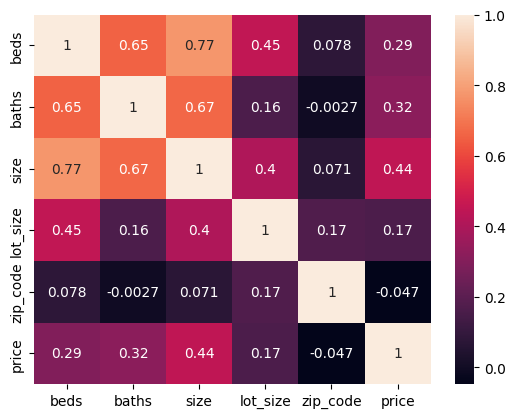

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

In [ ]:
X=data[['beds','baths','size','lot_size','zip_code']]
y=data['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
beds,-113144.239389
baths,29197.438208
size,549.662069
lot_size,3.882862
zip_code,-2530.750068


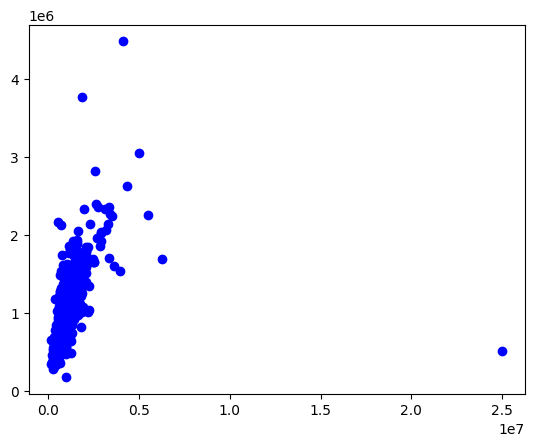

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions,color='blue')


In [ ]:
from sklearn import metrics
import numpy as np


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))



MAE: 274824.5279447666
MSE: 905258823763.6584
RMSE: 951450.904547186
